<a href="https://colab.research.google.com/github/m-atique/deeplearning-assignment/blob/main/Concreat_strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# =====  Assignment: Compresive Strength Concrete Problem======================

In [ ]:
import io
from google.colab import files
uploaded = files.upload()

Saving compresive_strength_concrete.csv to compresive_strength_concrete (1).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['compresive_strength_concrete.csv']))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
display(df.head())
print(df.shape)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


(1030, 9)


In [ ]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
y = df['Concrete compressive strength(MPa, megapascals) ']

In [ ]:
df.drop(columns='Concrete compressive strength(MPa, megapascals) ', inplace=True)

In [ ]:
df.shape

(1030, 8)

In [ ]:
train_data = df[:516]
train_labels = y[:516]
test_data = df[516:814]
test_labels = y[516:814]
val_data = df[814:]
val_labels = y[814:]

In [ ]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

In [ ]:
train_data -= mean
train_data /= std
#---------------------------
test_data -= mean
test_data /= std
#--------------------------
val_data -= mean
val_data /= std

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
model= models.Sequential()
model.add(layers.Dense(512, activation= 'relu', input_shape = (train_data.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics='mae')

In [ ]:
history = model.fit(train_data,train_labels, batch_size=16,  epochs=200, validation_data=(val_data, val_labels))

Epoch 1/200
33/33 [==============================] - 1s 8ms/step - loss: 1666.0898 - mae: 36.6876 - val_loss: 181.7983 - val_mae: 10.9904
Epoch 2/200
33/33 [==============================] - 0s 4ms/step - loss: 294.9237 - mae: 14.3197 - val_loss: 195.6440 - val_mae: 11.2727
Epoch 3/200
33/33 [==============================] - 0s 4ms/step - loss: 230.3797 - mae: 12.5427 - val_loss: 177.6962 - val_mae: 10.7220
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 184.8874 - mae: 11.2436 - val_loss: 163.0875 - val_mae: 10.4650
Epoch 5/200
33/33 [==============================] - 0s 3ms/step - loss: 174.3331 - mae: 10.8316 - val_loss: 215.0111 - val_mae: 12.1696
Epoch 6/200
33/33 [==============================] - 0s 4ms/step - loss: 151.0610 - mae: 10.0449 - val_loss: 169.8460 - val_mae: 10.6331
Epoch 7/200
33/33 [==============================] - 0s 4ms/step - loss: 157.6433 - mae: 10.3707 - val_loss: 181.8251 - val_mae: 10.9073
Epoch 8/200
33/33 [=====================

In [ ]:
train_mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, 201)

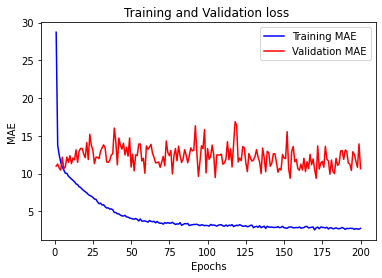

In [ ]:
plt.plot(epochs, train_mae, 'b', label='Training MAE')
plt.plot(epochs, val_mae, 'r-', label='Validation MAE')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

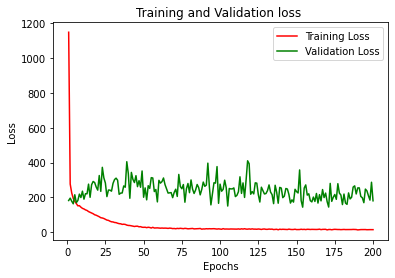

In [ ]:
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_labels

516     9.85
517    15.07
518    23.25
519    43.73
520    13.40
       ...  
809    19.69
810    14.99
811    27.92
812    34.68
813    37.33
Name: Concrete compressive strength(MPa, megapascals) , Length: 298, dtype: float64

In [ ]:
model.predict(test_data)

array([[ 8.746995 ],
       [11.299186 ],
       [27.926138 ],
       [41.91607  ],
       [18.757042 ],
       [22.869371 ],
       [49.498352 ],
       [55.38623  ],
       [55.38623  ],
       [35.38597  ],
       [35.38597  ],
       [41.379227 ],
       [41.379227 ],
       [62.524258 ],
       [62.524258 ],
       [40.756355 ],
       [36.412514 ],
       [ 6.848964 ],
       [16.831005 ],
       [44.402832 ],
       [32.94752  ],
       [49.02658  ],
       [38.386497 ],
       [54.686565 ],
       [34.712784 ],
       [10.263822 ],
       [35.918617 ],
       [ 7.698702 ],
       [ 9.863662 ],
       [18.558956 ],
       [24.926773 ],
       [13.516597 ],
       [21.31295  ],
       [38.207954 ],
       [20.663116 ],
       [ 4.036048 ],
       [14.233455 ],
       [38.59114  ],
       [18.645504 ],
       [36.16819  ],
       [39.63067  ],
       [21.551414 ],
       [23.242577 ],
       [61.81168  ],
       [33.306152 ],
       [37.677864 ],
       [24.477499 ],
       [25.51

In [ ]:
model.evaluate(test_data,test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 47.8689 - mae: 5.4594


[47.86888885498047, 5.459357738494873]